# 决策树
决策树是通过一系列规则对数据进行分类的过程。它提供一种在什么条件下会得到什么值的类似规则的方法。
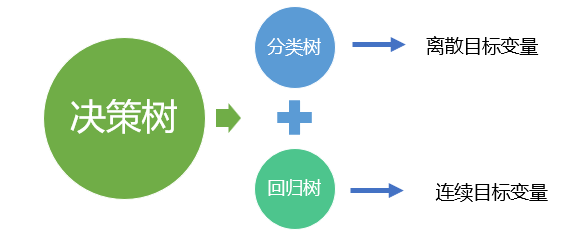

* 一棵决策树包含一个根结点、若干个内部结点和若干个叶子结点
* 叶结点对应于决策结果，其他每个结点则对应于一个属性测试
* 每个结点包含的样本集合根据属性测试的结果划分到其子结点中
* 根结点包含样本全集
* 从根结点到每个叶结点的路径对应了一个判定测试序列
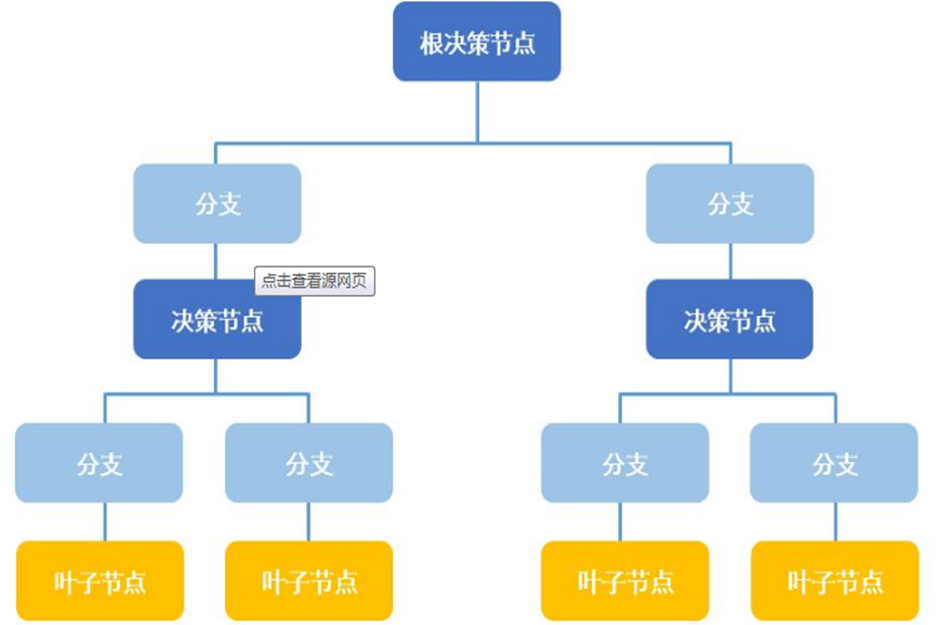

决策树分类器重点在于如何构造决策树：样本所有特征中有一些特征在分类时起到决定性作用，决策树的构造过程就是找到这些具有决定性作用的特征，根据其决定性作用大小来逐层构造决策树。
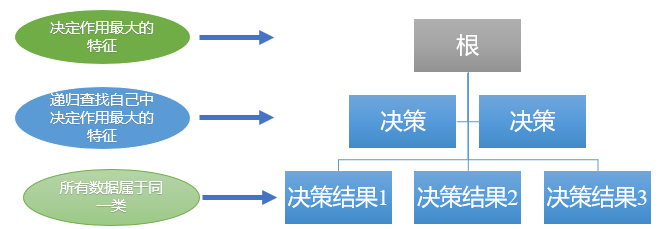



一棵决策树的生成过程主要分为**特征选择**和**决策树生长**。

* 特征选择是指从训练数据中众多的特征中选择一个最优特征作为当前结点的分裂标准，如何选择最优特征有着不同量化评估标准，从而衍生出不同的决策树算法。例如ID3、C4.5和CART等。
* 决策树生成：根据选择的特征评估标准，从上至下递归地生成子结点，直到数据集不可分则停止决策树生长。


## 特征选择
* 通常特征选择的准则有信息增益、信息增益率或基尼指数。
    * 特征选择的划分依据：如果使用某一特征将训练数据集分裂成多个子集，使得各个子集在当前条件下具有最好的分类，那么就应该选择这个特征。划分即指将数据集划分为纯度更高、不确定性更小的子集的过程。
    * 如果属性值是连续型，则可以确定一个值作为分裂点splitPoint，按照大于splitPoint和小于等于splitPoint生成两个分支。

1. 信息增益
信息增益，即信息熵（不确定信息）的下降。信息熵是度量样本集合纯度最常用的一种指标。假定当前样本集合D中第k类样本所占的比例为$𝑝_𝑘 (k=1,2,...,|Y|)$，则D的信息熵定义为：
$$
\operatorname{Ent}(D)=-\sum_{k=1}^{|Y|} p_{k} \log _{2} p_{k}
$$

假定离散属性a有V个可能的取值$\left\{a^{1}, a^{2}, \ldots, a^{V}\right\}$，若使用a来对样本集D进行划分，则会产生V个分支结点，其中第v个分支结点包含了D中所有在属性a上取值为$𝑎^𝑣$的样本，记为$𝐷^𝑣$。根据Ent(D)计算公式计算出$𝐷^𝑣$的信息熵，再考虑到不同的分支结点所包含的样本数不同，给分支结点赋予权重$|𝐷^𝑣|/|D|$，即样本数越多的分支结点、其影响越大，因此可计算出用属性a对样本集D进行划分所获得的信息增益：
$$
\operatorname{Gain}(D, a)=\operatorname{Ent}(D)-\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Ent}\left(D^{v}\right)
$$
一般而言，信息增益越大，则意味着使用属性a来进行划分所获得的“纯度提升”越大。著名的ID3决策树学习算法就是以信息增益为准则（将信息增益最大的属性选为划分属性）来选择划分属性。


2. 信息增益率
实际上，信息增益准则对可能取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的C4.5决策树算法不直接使用信息增益，而是使用“增益率”来选择最优特征。增益率定义为：
$$
\text { Gain_ratio }(D, a)=\frac{G a i n(D, a)}{I V(a)}
$$
其中：
$$
I V(a)=-\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \log _{2} \frac{\left|D^{v}\right|}{|D|}
$$
称为属性a的“固有值”。属性a的可能取值数目越多（即V越大），IV(a)的值通常越大。
需注意的是，信息率准则对可能取值数目较少的属性有所偏好，因此C4.5算法并不是直接选取增益率最大的特征，而是使用了一个启发式规则：先从候选划分属性中找出信息增益高于平均水平的属性，再从中选择增益率最高的属性作为当前划分依据。


3. 基尼指数
CART决策树使用“基尼指数”来选择最优特征。首先给出基尼值的定义：
$$
\operatorname{Gini}(D)=\sum_{k=1}^{|Y|} \sum_{k^{\prime} \neq k} p_{k} p_{k^{\prime}}=1-\sum_{k=1}^{|Y|} p_{k}^{2}
$$
直观来说，Gini(D)反映了从数据集D中随机抽取两个样本，其类别标记不一致的概率。因此，Gini(D)越小，则数据集D的纯度越高。
下面基于基尼值给出基尼指数的定义：
$$
\text { Gini_index }(D, a)=\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Gini}\left(D^{v}\right)
$$
我们在候选属性集A中，选择那个使得划分后基尼指数最小的属性特征，将其作为最优特征完成一次样本数据的划分。


## 连续值处理
给定样本集D和连续属性a，假设a在D上出现了n个不同的取值，将这些值从小到大进行排序，记为${𝑎^1,𝑎^2,…𝑎^𝑛}$。基于划分点t可将D分为子集$𝐷_𝑡^−$和$𝐷_𝑡^+$，其中$𝐷_𝑡^−$包含那些在属性a上取值不大于t的样本，而$𝐷_𝑡^+$则包含那些在属性a上取值大于t的样本。
        显然，对相邻的属性取值$𝑎^𝑖$与$𝑎^{𝑖+1}$来说，t在区间$[𝑎^𝑖,𝑎^{𝑖+1})$中取任意值所产生的划分结果相同。因此，对连续属性a，我们可考察包含n-1个元素的候选划分点集合：
$$
T_{a}=\left\{\frac{a^{i}+a^{i+1}}{2} \mid 1 \leq i \leq n-1\right\}
$$
即把区间$[𝑎^𝑖,𝑎^{𝑖+1})$的中位点$(𝑎^𝑖+𝑎^{𝑖+1})/2$作为候选划分点。然后，我们就可像离散属性值一样来考察这些划分点，选取最优划分点进行样本集合的划分。

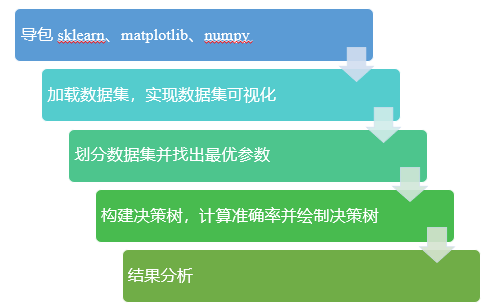